# Práctica 3
# Análisis de Señales Bioeléctricas

In [94]:
'''
Código de la práctica 3
21/10/19
'''
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as Sig
from scipy.stats import pearsonr as r
from scipy.signal import coherence as ch
from numpy.fft import fft as fft

In [9]:
def graf(signal):
    plt.figure( figsize=(17,13) )
    plt.plot( signal, color='skyblue')
    plt.xticks(size=20,color='w')
    plt.yticks(size=20,color='w')
    plt.grid()

In [3]:
def escala1(signal):
    signal = np.array(signal)
    signal = 2*signal / np.ptp(signal)
    signal -= (signal.max()-1)
    return signal

In [4]:
def zscore(signal):
    return ( signal - signal.mean( axis=0 ) ) / signal.std(axis=0)

In [5]:
def relacion(signal1, signal2):
    rel = r(signal1, signal2)[0]
    if rel > .8:
        print('Pues si hay una correlación, felicidades! \nCorr = ', rel)
    else:
        print('No hay nada, no se sabe qué está pasando \nCorr = ', rel, '\n\n\n\n\n\n\n\n\n\n\nHuye!!!!!')
    return rel

In [6]:
def histogram(s, nbins=10, width=.5, title='Histograma'):
    intervals = np.linspace( s.min(), s.max(), nbins+1 )
    
    left = s[:,np.newaxis] > intervals[:-1][np.newaxis]
    right = s[:,np.newaxis] < intervals[1:][np.newaxis]
    
    hist = (left*right).sum(axis=0)
    plt.bar(intervals[:-1], hist, width, color='teal')
    plt.grid()
    plt.title(title, size=10, color='lightcoral')
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.show()
    
    return intervals[:-1], hist

In [109]:
def coherencia(x, y):
    ft,  Sxy = Sig.csd( x,y, fs=200 )
    fx, Sx = Sig.welch( x, fs=200 )
    fy, Sy = Sig.welch( y, fs=200 )
    
    cohe = np.power(Sxy, 2) / ( Sx*Sy )
    
    return ft, cohe

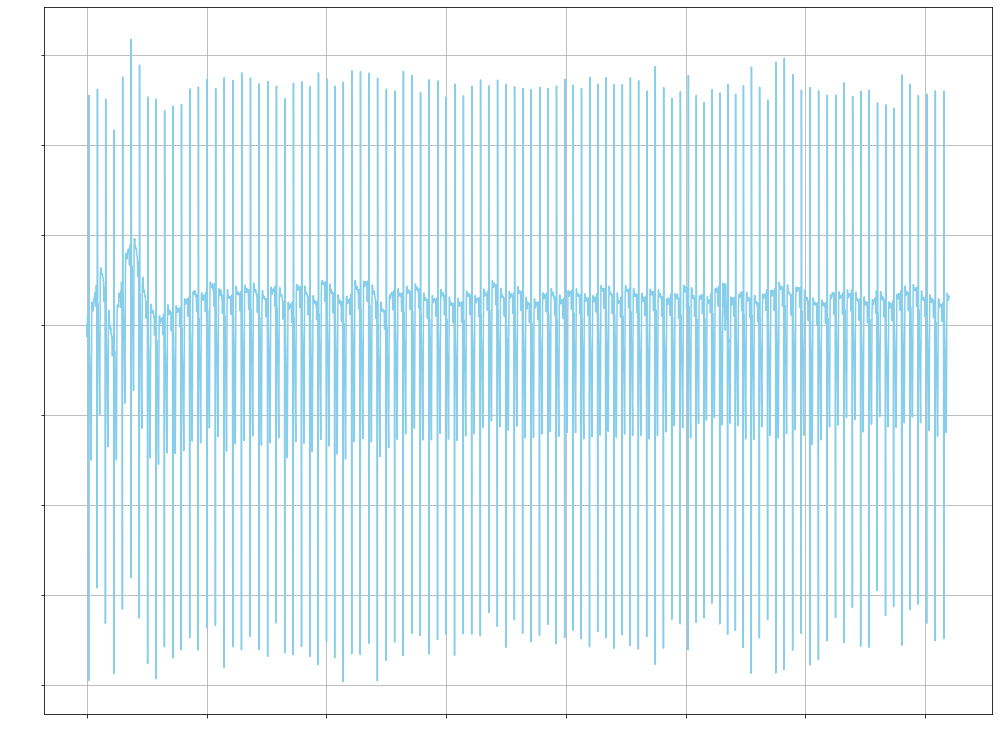

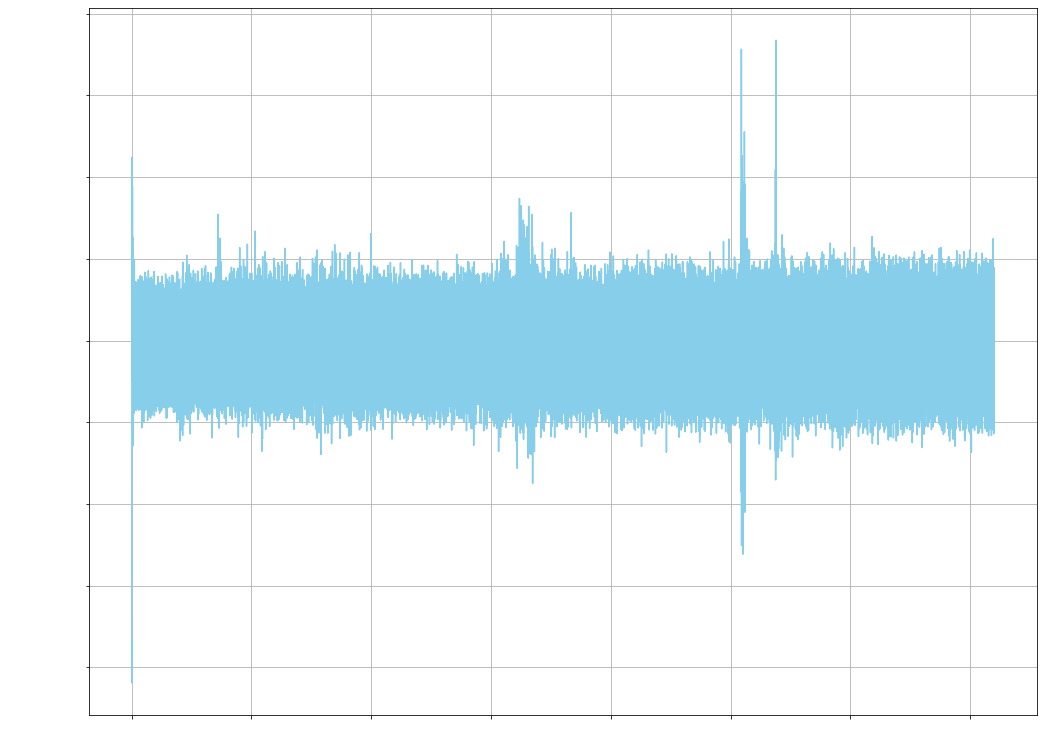

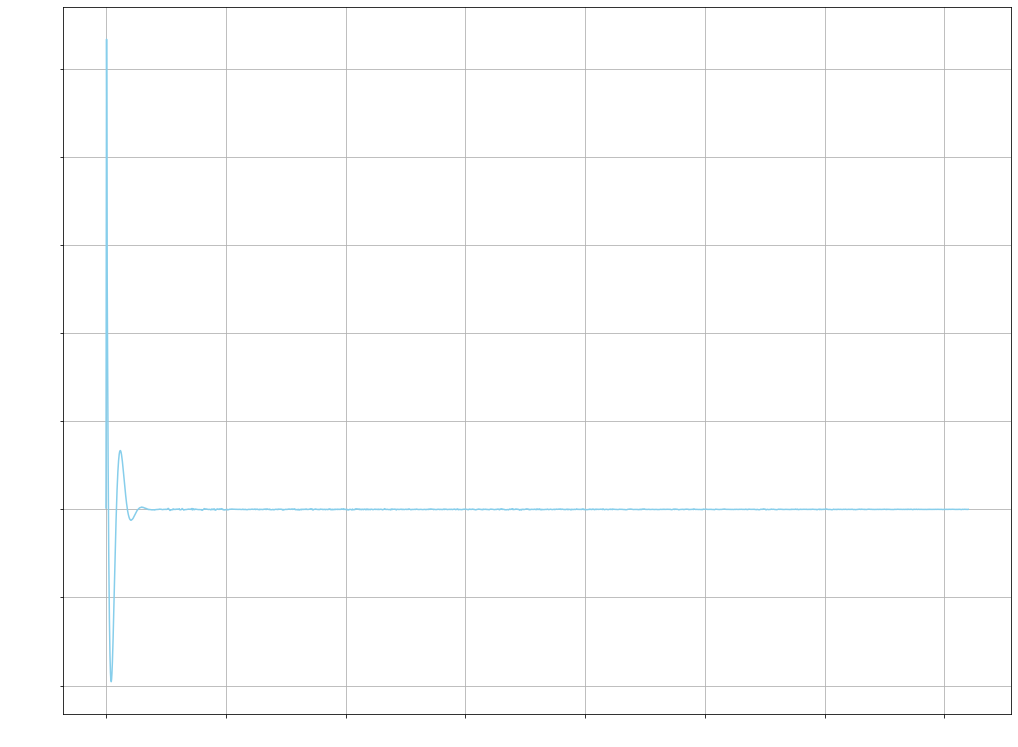

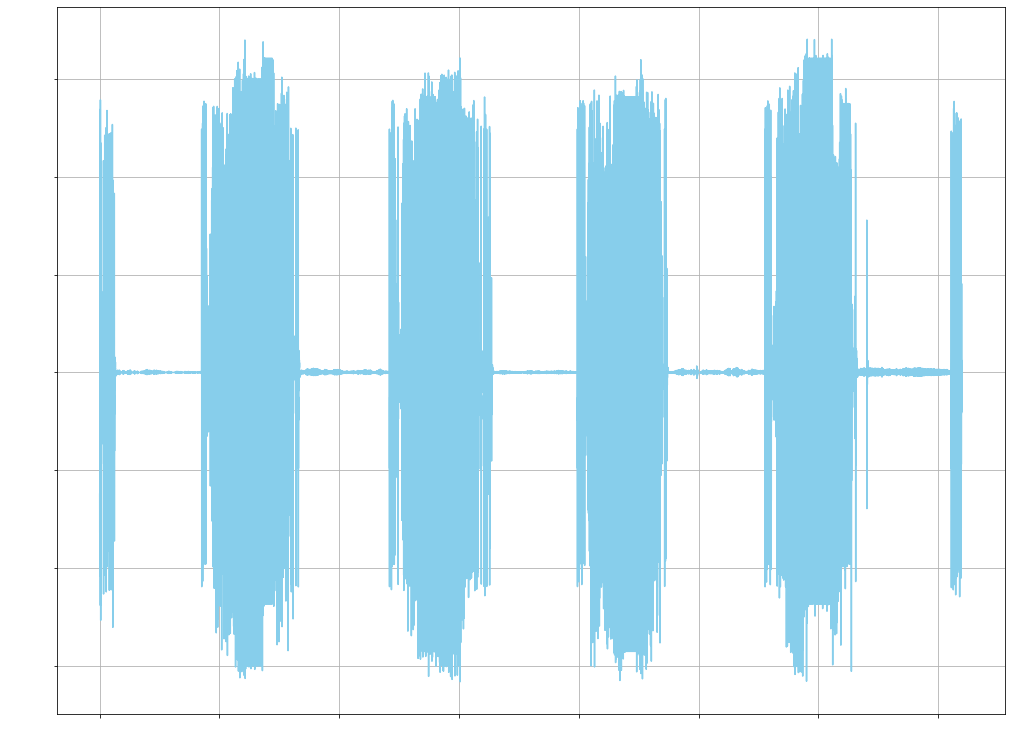

In [10]:
# Los registros ya estan acondicionados
signals = np.load('/home/edu/Documentos/GitHub/MCIB-19-P-Edu/data/P2/filtrados.npz')

EKG = signals['EKG']
EMG = signals['EMG']
OXI = signals['OXI']
PLE = signals['PLET']

for name in signals:
    graf(signals[name])

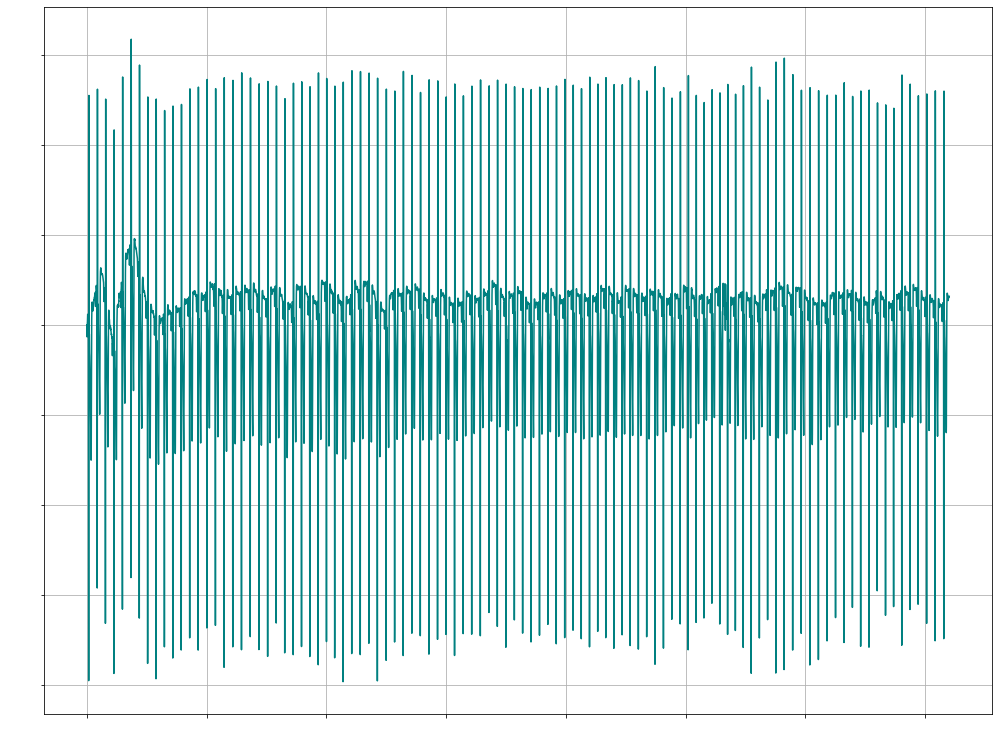

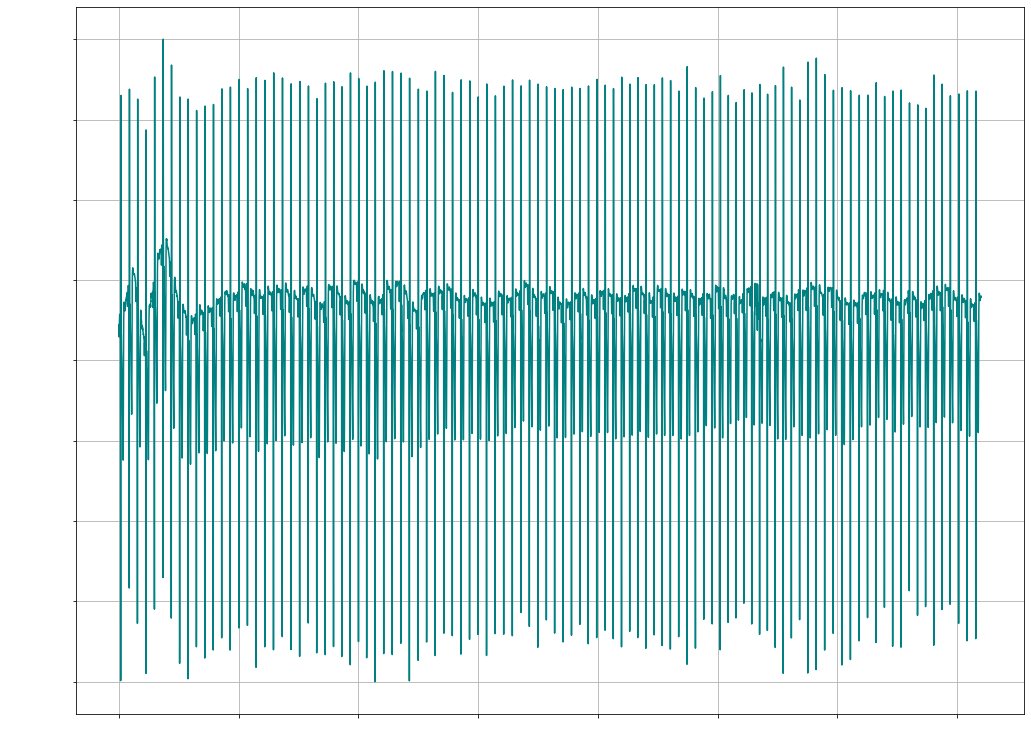

In [8]:
graf(EKG)

graf(escala1(EKG))

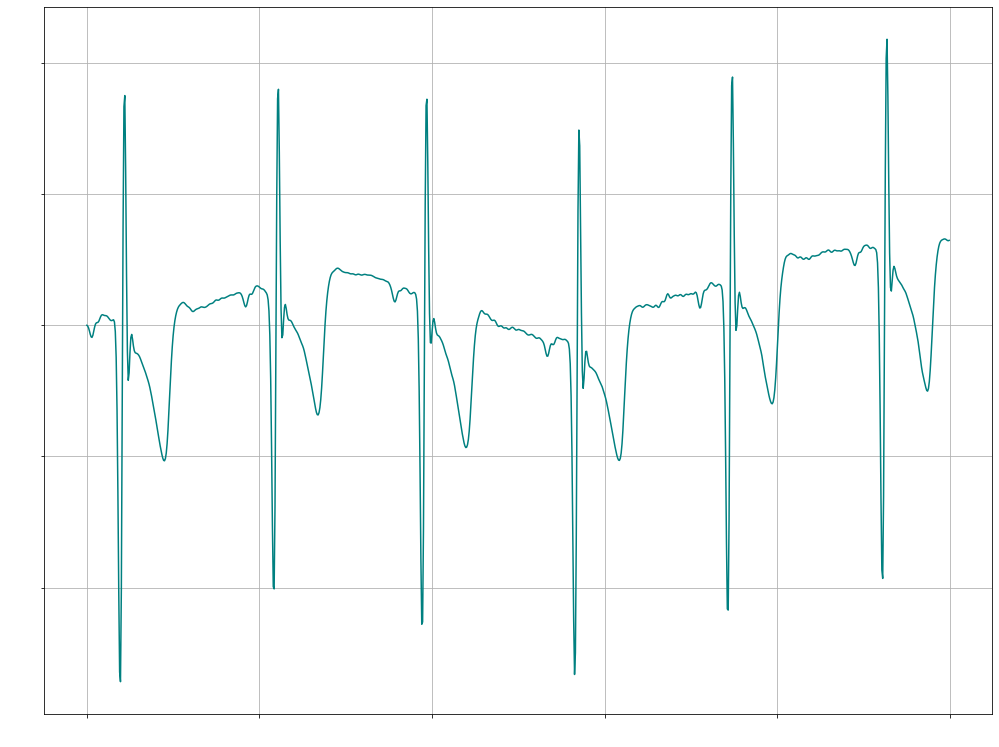

In [12]:
zEKG = zscore(EKG)
graf(zEKG[:1000])

In [ ]:
relacion(EKG,EMG)

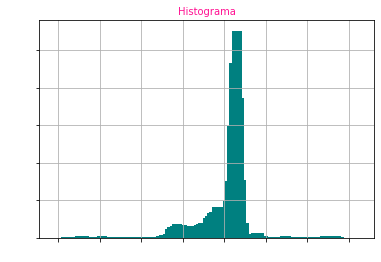

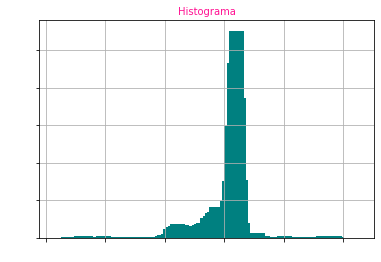

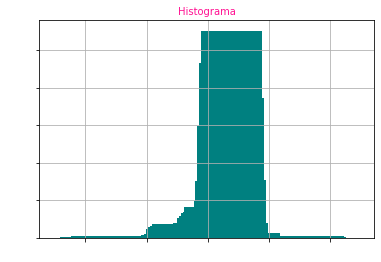

(array([-1.        , -0.98507463, -0.97014925, -0.95522388, -0.94029851,
        -0.92537313, -0.91044776, -0.89552239, -0.88059701, -0.86567164,
        -0.85074627, -0.8358209 , -0.82089552, -0.80597015, -0.79104478,
        -0.7761194 , -0.76119403, -0.74626866, -0.73134328, -0.71641791,
        -0.70149254, -0.68656716, -0.67164179, -0.65671642, -0.64179104,
        -0.62686567, -0.6119403 , -0.59701493, -0.58208955, -0.56716418,
        -0.55223881, -0.53731343, -0.52238806, -0.50746269, -0.49253731,
        -0.47761194, -0.46268657, -0.44776119, -0.43283582, -0.41791045,
        -0.40298507, -0.3880597 , -0.37313433, -0.35820896, -0.34328358,
        -0.32835821, -0.31343284, -0.29850746, -0.28358209, -0.26865672,
        -0.25373134, -0.23880597, -0.2238806 , -0.20895522, -0.19402985,
        -0.17910448, -0.1641791 , -0.14925373, -0.13432836, -0.11940299,
        -0.10447761, -0.08955224, -0.07462687, -0.05970149, -0.04477612,
        -0.02985075, -0.01492537,  0.        ,  0.0

In [10]:
histogram(EKG, nbins=np.sqrt(EKG.shape[0]))
histogram(zEKG, nbins=np.sqrt(EKG.shape[0]))
histogram(escala1(EKG), nbins=np.sqrt(EKG.shape[0]))

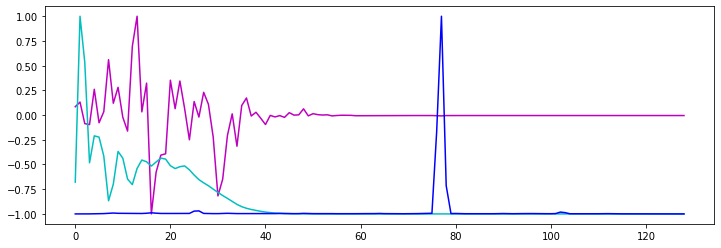

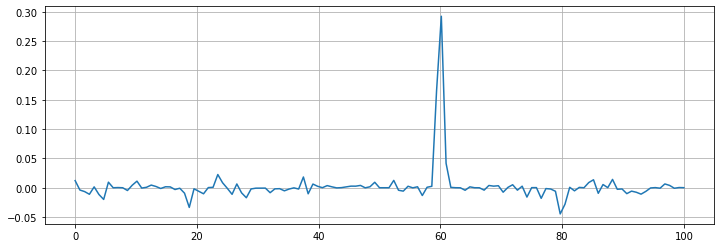

In [111]:
ft, C = coherencia(EKG, EMG)
w = np.linspace( 0, 100, EMG.shape[0]//2 )

plt.figure('Coherencia 1 ', figsize=( 12,4 ) )
plt.plot(ft, C )
plt.grid()


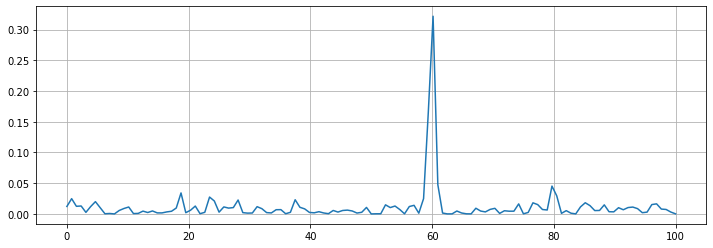

In [58]:
f, Cxy = ch(EKG, EMG, 200) 
plt.figure( figsize=(12,4) )
plt.plot( f, Cxy )
plt.grid()
